### Imports

In [48]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq
import random
import time

### Structures

In [3]:
class Edge:
    def __init__(self, v1, v2, weight):
        self.v1 = v1
        self.v2 = v2
        self.weight = weight

    def __repr__(self):
        return f"{self.v1} --{self.weight}--> {self.v2}"

In [50]:

class Edge:
    def __init__(self, v1, v2, weight):
        self.v1 = v1
        self.v2 = v2
        self.weight = weight

    def __str__(self):
        return f"({self.v1}, {self.v2}, {self.weight})"

class Graph:
    def __init__(self):
        self.edges = []

    def add_edge(self, v1, v2, weight):
        if not self.find_edge(v1, v2):
            self.edges.append(Edge(v1, v2, weight))

    def remove_edge(self, v1, v2):
        self.edges = [edge for edge in self.edges if not ((edge.v1 == v1 and edge.v2 == v2) or (edge.v1 == v2 and edge.v2 == v1))]

    def remove_vertex(self, v):
        self.edges = [edge for edge in self.edges if edge.v1 != v and edge.v2 != v]

    def find_edge(self, v1, v2):
        return any((edge.v1 == v1 and edge.v2 == v2) or (edge.v1 == v2 and edge.v2 == v1) for edge in self.edges)

    def print_graph(self):
        print("Edges in the Graph:")
        for edge in self.edges:
            print(edge)

def generate_random_graph(num_nodes, average_degree, weight_range=(1, 20)):
    graph = Graph()

    for i in range(num_nodes):
        num_edges = random.randint(0, min(average_degree, num_nodes - 1))
        neighbors = random.sample(range(num_nodes), num_edges)
        for neighbor in neighbors:
            if neighbor != i:
                weight = random.randint(*weight_range)
                graph.add_edge(i, neighbor, weight)

    return graph

In [51]:
class UnionFind:
    def __init__(self, size):
        self.parent = list(range(size))
        self.rank = [0] * size

    def find(self, p):
        if self.parent[p] != p:
            self.parent[p] = self.find(self.parent[p])
        return self.parent[p]

    def union(self, p, q):
        rootP = self.find(p)
        rootQ = self.find(q)
        if rootP != rootQ:
            if self.rank[rootP] > self.rank[rootQ]:
                self.parent[rootQ] = rootP
            elif self.rank[rootP] < self.rank[rootQ]:
                self.parent[rootP] = rootQ
            else:
                self.parent[rootQ] = rootP
                self.rank[rootP] += 1


### Algorathims

In [52]:
def kruskal(graph):
    mst = []
    edges = sorted(graph.edges, key=lambda edge: edge.weight)
    uf = UnionFind(max(max(edge.v1, edge.v2) for edge in edges) + 1)
    
    for edge in edges:
        if uf.find(edge.v1) != uf.find(edge.v2):
            uf.union(edge.v1, edge.v2)
            mst.append(edge)
    
    return mst

def visualize_graph(graph):
    G = nx.Graph()
    for edge in graph.edges:
        G.add_edge(edge.v1, edge.v2, weight=edge.weight)
    
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Graph Visualization")
    return plt

def visualize_mst(mst):
    G = nx.Graph()
    for edge in mst:
        G.add_edge(edge.v1, edge.v2, weight=edge.weight)
    
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1500, font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Minimum Spanning Tree Visualization")
    return plt


In [140]:
def prim_mst(graph):
    mst = []
    visited = set()
    start_node = 0  # Start from node 0, you can choose any starting node
    
    # Create a priority queue to store the edges
    pq = []
    heapq.heappush(pq, (0, start_node, None))  # (weight, node, parent)

    while pq:
        weight, node, parent = heapq.heappop(pq)
        if node not in visited:
            visited.add(node)
            if parent is not None:
                mst.append((parent, node, weight))
            for neighbor, weight in graph[node]:
                if neighbor not in visited:
                    heapq.heappush(pq, (weight, neighbor, node))
    
    return mst

def create_adjacency_list(graph):
    adjacency_list = [[] for _ in range(len(graph.edges))]
    for edge in graph.edges:
        adjacency_list[edge.v1].append((edge.v2, edge.weight))
        adjacency_list[edge.v2].append((edge.v1, edge.weight))
    return adjacency_list
def visualize_mst_prim(graph, mst_prim):
    G = nx.Graph()
    
    # Add edges from original graph
    for edge in graph.edges:
        G.add_edge(edge.v1, edge.v2, weight=edge.weight)
    
    # Add edges from MST obtained using Prim's algorithm
    for edge in mst_prim:
        G.add_edge(edge[0], edge[1], weight=edge[2])  # Do not specify color here
    
    pos = nx.spring_layout(G)
    
    # Extract edge colors
    edge_colors = ['red' if (u, v) in mst_prim or (v, u) in mst_prim else 'seagreen' for u, v in G.edges()]
    
    nx.draw(G, pos, with_labels=True, node_color='red', node_size=1500, font_size=10, font_weight='bold', edge_color=edge_colors)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Minimum Spanning Tree Visualization (Prim's Algorithm)")
    plt.show()



In [74]:


def visualize_mst_title(graph, mst, title):
    G = nx.Graph()
    G.add_weighted_edges_from(graph)
    
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold')
    nx.draw_networkx_edges(G, pos, edgelist=mst, edge_color='red', width=2)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(title)
    plt.show()

In [232]:
import random

class Edge:
    def __init__(self, v1, v2, weight):
        self.v1 = v1
        self.v2 = v2
        self.weight = weight

    def __str__(self):
        return f"({self.v1}, {self.v2}, {self.weight})"

class Graph:
    def __init__(self):
        self.edges = []

    def add_edge(self, v1, v2, weight):
        if not self.find_edge(v1, v2):
            self.edges.append(Edge(v1, v2, weight))

    def remove_edge(self, v1, v2):
        self.edges = [edge for edge in self.edges if not ((edge.v1 == v1 and edge.v2 == v2) or (edge.v1 == v2 and edge.v2 == v1))]

    def remove_vertex(self, v):
        self.edges = [edge for edge in self.edges if edge.v1 != v and edge.v2 != v]

    def find_edge(self, v1, v2):
        return any((edge.v1 == v1 and edge.v2 == v2) or (edge.v1 == v2 and edge.v2 == v1) for edge in self.edges)

    def print_graph(self):
        print("Edges in the Graph:")
        for edge in self.edges:
            print(edge)

def generate_random_graph(num_nodes, average_degree, weight_range=(1, 20)):
    graph = Graph()

    for i in range(num_nodes):
        num_edges = random.randint(0, min(average_degree, num_nodes - 1))
        neighbors = random.sample(range(num_nodes), num_edges)
        for neighbor in neighbors:
            if neighbor != i:
                weight = random.randint(*weight_range)
                graph.add_edge(i, neighbor, weight)

    return graph

# Create a Graph with  nodes and an average degree of 10
graph = generate_random_graph(num_nodes=10000, average_degree=3)
graph.print_graph()


Edges in the Graph:
(1, 3291, 13)
(1, 3715, 20)
(1, 8478, 12)
(4, 6423, 18)
(4, 3900, 3)
(4, 116, 18)
(5, 6951, 14)
(5, 4065, 12)
(5, 383, 20)
(6, 9760, 7)
(6, 8922, 2)
(6, 8629, 18)
(7, 6515, 12)
(7, 4978, 11)
(8, 6508, 14)
(8, 6299, 3)
(8, 1098, 2)
(9, 8877, 5)
(9, 6581, 10)
(10, 6390, 9)
(10, 3235, 11)
(11, 6202, 16)
(13, 7378, 1)
(13, 6665, 9)
(13, 6997, 14)
(14, 1838, 15)
(14, 9632, 11)
(14, 3408, 14)
(16, 463, 18)
(16, 5822, 13)
(16, 7005, 6)
(17, 7094, 10)
(17, 207, 19)
(18, 6803, 1)
(18, 2464, 5)
(19, 9182, 14)
(19, 4355, 17)
(19, 9159, 18)
(20, 9844, 20)
(22, 2596, 17)
(22, 4883, 20)
(22, 1932, 7)
(23, 8300, 20)
(23, 6238, 7)
(23, 4465, 8)
(24, 9254, 11)
(25, 641, 2)
(26, 4214, 16)
(26, 5574, 9)
(26, 1742, 16)
(27, 3304, 7)
(27, 3133, 5)
(28, 9169, 10)
(28, 2611, 19)
(28, 2413, 2)
(30, 4907, 12)
(30, 7893, 18)
(32, 710, 3)
(32, 1621, 8)
(32, 8877, 17)
(34, 5138, 11)
(34, 5259, 17)
(34, 4617, 8)
(35, 250, 4)
(36, 3184, 3)
(36, 8641, 5)
(36, 5116, 13)
(37, 3859, 10)
(37, 2873, 1

In [92]:
graph.print_graph()
plt_graph = visualize_graph(graph)
plt_graph.show()

Edges in the Graph:
(0, 8461, 20)
(0, 4936, 16)
(0, 8896, 5)
(0, 1626, 2)
(1, 7931, 2)
(1, 7722, 3)
(3, 2733, 9)
(3, 6136, 6)
(4, 8094, 14)
(4, 1619, 18)
(4, 8538, 20)
(5, 9507, 14)
(7, 857, 3)
(8, 5920, 14)
(8, 423, 19)
(8, 8244, 19)
(9, 9687, 10)
(9, 9390, 9)
(9, 5702, 10)
(9, 2012, 16)
(10, 5249, 17)
(10, 1004, 18)
(12, 4906, 8)
(12, 4675, 12)
(13, 6806, 6)
(14, 1031, 2)
(14, 4502, 4)
(15, 8920, 10)
(15, 6301, 15)
(15, 6692, 12)
(15, 5236, 1)
(16, 6539, 10)
(17, 8429, 13)
(17, 7607, 5)
(17, 2513, 11)
(17, 956, 14)
(19, 4258, 6)
(19, 7070, 14)
(19, 1978, 15)
(19, 4462, 6)
(19, 9099, 13)
(20, 34, 17)
(20, 1250, 3)
(20, 4966, 4)
(20, 4965, 11)
(22, 6651, 7)
(22, 9337, 13)
(22, 3606, 12)
(22, 44, 7)
(23, 8576, 16)
(23, 9321, 7)
(23, 1617, 19)
(23, 2007, 14)
(23, 3595, 7)
(25, 3761, 15)
(25, 8702, 17)
(25, 1175, 5)
(25, 380, 14)
(25, 3547, 9)
(27, 2924, 14)
(27, 853, 5)
(27, 7324, 16)
(27, 501, 18)
(28, 6137, 20)
(28, 6084, 12)
(28, 5482, 13)
(28, 3898, 11)
(28, 9006, 15)
(29, 5548, 10)


ModuleNotFoundError: No module named 'scipy'

In [ ]:
mst = kruskal(graph)
plt_mst = visualize_mst(mst)
plt_mst.show()


In [ ]:
adjacency_list = create_adjacency_list(graph)
mst_prim = prim_mst(adjacency_list)
visualize_mst_prim(graph, mst_prim)

### Reverse delete

In [115]:
def reverse_delete_mst(graph):
    sorted_edges = sorted(graph.edges, key=lambda edge: edge.weight, reverse=True)
    mst = []
    uf = UnionFind(len(graph.edges))
    
    for edge in sorted_edges:
        uf.union(edge.v1, edge.v2)
        if len(set(uf.parent)) > 1:
            uf.union(edge.v1, edge.v2)
            mst.append(edge)
    return mst

def visualize_mst_reverse_delete(graph, mst_reverse_delete):
    G = nx.Graph()
    for edge in graph.edges:
        G.add_edge(edge.v1, edge.v2, weight=edge.weight)
    
    for edge in mst_reverse_delete:
        G.add_edge(edge.v1, edge.v2, weight=edge.weight)
    
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Minimum Spanning Tree Visualization (Reverse-Delete Algorithm)")
    plt.show()

Edges in the Graph:
(0, 2, 1)
(0, 4, 11)
(0, 5, 10)
(0, 9, 5)
(0, 10, 5)
(0, 11, 1)
(0, 13, 2)
(0, 15, 1)
(0, 17, 7)
(0, 20, 1)
(0, 28, 5)
(0, 32, 19)
(0, 33, 18)
(0, 36, 4)
(0, 37, 5)
(0, 39, 18)
(0, 41, 9)
(0, 42, 18)
(0, 47, 2)
(1, 2, 2)
(1, 7, 6)
(1, 8, 10)
(1, 9, 4)
(1, 11, 10)
(1, 13, 8)
(1, 14, 4)
(1, 15, 11)
(1, 16, 9)
(1, 20, 11)
(1, 21, 13)
(1, 22, 9)
(1, 26, 10)
(1, 27, 3)
(1, 28, 16)
(1, 29, 3)
(1, 30, 1)
(1, 33, 13)
(1, 36, 17)
(1, 37, 15)
(1, 41, 20)
(1, 43, 1)
(1, 47, 5)
(1, 49, 16)
(2, 10, 11)
(2, 12, 20)
(2, 16, 17)
(2, 18, 9)
(2, 20, 3)
(2, 21, 20)
(2, 25, 12)
(2, 26, 10)
(2, 28, 3)
(2, 29, 6)
(2, 32, 6)
(2, 34, 4)
(2, 38, 13)
(2, 39, 17)
(2, 43, 9)
(2, 46, 14)
(2, 48, 16)
(3, 4, 5)
(3, 9, 17)
(3, 11, 18)
(3, 12, 10)
(3, 13, 11)
(3, 16, 10)
(3, 17, 4)
(3, 29, 10)
(3, 32, 10)
(3, 33, 2)
(3, 34, 1)
(3, 38, 7)
(3, 40, 10)
(3, 45, 14)
(3, 46, 10)
(4, 5, 2)
(4, 6, 19)
(4, 10, 20)
(4, 11, 14)
(4, 14, 10)
(4, 17, 11)
(4, 20, 7)
(4, 21, 16)
(4, 22, 15)
(4, 25, 8)
(4, 26, 7)
(

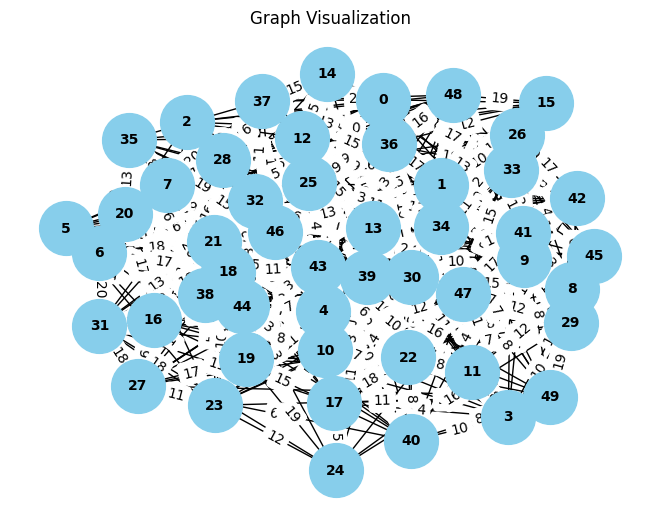

In [56]:
graph = Graph()
num_nodes = 50

for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        if random.random() < 0.4:
            weight = random.randint(1, 20)
            graph.add_edge(i, j, weight)

graph.print_graph()
plt_graph = visualize_graph(graph)
plt_graph.show()

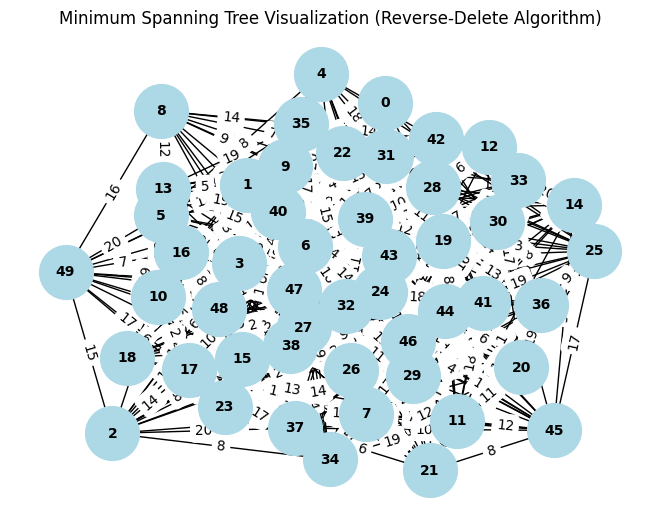

In [71]:

mst_reverse_delete = reverse_delete_mst(graph)
visualize_mst_reverse_delete(graph, mst_reverse_delete)

### Borůvka's Algorithm

In [236]:
def boruvkaMST(graph):
    parent = []
    rank = []
    cheapest = []

    numTrees = len(graph.edges)  # Number of trees initially equals the number of edges
    MSTweight = 0

    for node in range(len(graph.edges)):
        parent.append(node)
        rank.append(0)
        cheapest.append(-1)

    while numTrees > 1:
        for i, edge in enumerate(graph.edges):
            u, v, w = edge.v1, edge.v2, edge.weight
            set1 = find(parent, u)
            set2 = find(parent, v)

            if set1 != set2:
                if cheapest[set1] == -1 or cheapest[set1].weight > w:
                    cheapest[set1] = edge

                if cheapest[set2] == -1 or cheapest[set2].weight > w:
                    cheapest[set2] = edge

        for node in range(len(graph.edges)):
            if cheapest[node] != -1:
                u, v, w = cheapest[node].v1, cheapest[node].v2, cheapest[node].weight
                set1 = find(parent, u)
                set2 = find(parent, v)

                if set1 != set2:
                    MSTweight += w
                    union(parent, rank, set1, set2)
                    
                    numTrees -= 1

        cheapest = [-1] * len(graph.edges)



# Define helper functions find and union
def find(parent, i):
    if parent[i] == i:
        return i
    return find(parent, parent[i])

def union(parent, rank, x, y):
    xroot = find(parent, x)
    yroot = find(parent, y)

    if rank[xroot] < rank[yroot]:
        parent[xroot] = yroot
    elif rank[xroot] > rank[yroot]:
        parent[yroot] = xroot
    else:
        parent[yroot] = xroot
        rank[xroot] += 1

            
def visualize_mst_boruvka(graph, mst_boruvka):
    G = nx.Graph()
    
    # Add edges from original graph
    for node, neighbors in enumerate(graph):
        for neighbor, weight in neighbors:
            G.add_edge(node, neighbor, weight=weight)
    
    # Add edges from MST obtained using Borůvka's algorithm
    for edge in mst_boruvka:
        G.add_edge(edge[0], edge[1], weight=edge[2])
    
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Minimum Spanning Tree Visualization (Borůvka's Algorithm)")
    plt.show()


In [ ]:
adjacency_list = create_adjacency_list(graph)
mst_boruvka = boruvka_mst(adjacency_list)
visualize_mst_boruvka(adjacency_list, mst_boruvka)


### Chazelle Algorithms

In [16]:
def chazelle_mst(graph):
    mst = []
    # Randomly permute the edges of the graph
    edges = random.sample(graph.edges, len(graph.edges))
    uf = UnionFind(max(max(edge.v1, edge.v2) for edge in edges) + 1)
    
    for edge in edges:
        if uf.find(edge.v1) != uf.find(edge.v2):
            uf.union(edge.v1, edge.v2)
            mst.append(edge)
    
    return mst

<module 'matplotlib.pyplot' from 'd:\\black hat hacking\\python\\001 path of python\\Lib\\site-packages\\matplotlib\\pyplot.py'>

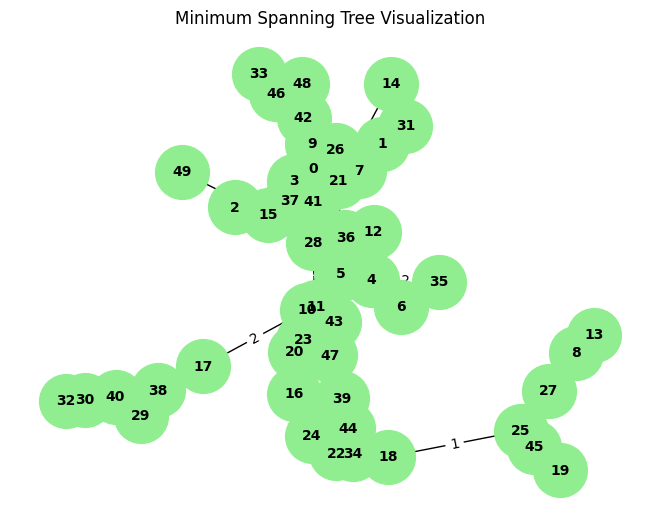

In [77]:
mst_chazelle = chazelle_mst(graph)
visualize_mst(mst_chazelle)

### Final Arc

In [237]:
def generate_random_graph(num_nodes, num_edges):
    graph = Graph()

    edges_added = 0
    while edges_added < num_edges:
        v1 = random.randint(0, num_nodes - 1)
        v2 = random.randint(0, num_nodes - 1)
        if v1 != v2 and not graph.find_edge(v1, v2):
            weight = random.randint(1, 20)
            graph.add_edge(v1, v2, weight)
            edges_added += 1

    return graph

def measure_time(edges, mst_algo):
    times = []

    for num_edges in edges:
        graph = generate_random_graph(num_edges, num_edges)
        
        start_time = time.time()
        if mst_algo == 'kruskal':
            kruskal(graph)
        elif mst_algo == 'prim':
            adjacency_list = create_adjacency_list(graph)
            prim_mst(adjacency_list)
        elif mst_algo == 'chazelle':
            chazelle_mst(graph)
        elif mst_algo == 'Reverse_delete':
            reverse_delete_mst(graph)
        elif mst_algo == 'boruvkaMST':
            boruvkaMST(graph)
        else:
            raise ValueError("Invalid MST algorithm specified")
        
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f'for {mst_algo} time taken for edges = {num_edges} is {elapsed_time}')
        times.append(elapsed_time)
    
    return times

In [238]:
edges = [10,100,1000,10000,50000,100000]
mst_algos = ['kruskal', 'prim', 'chazelle','Reverse_delete','boruvkaMST']

In [239]:
plt.figure(figsize=(10, 6))
# for mst_algo in mst_algos:
times = measure_time(edges, 'boruvkaMST')
    
    

for boruvkaMST time taken for edges = 10 is 3.504753112792969e-05


KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

In [137]:
#plt.xlabel('Number of Edges')
#plt.title('Time vs Number of Edges for Different MST Algorithms')
#plt.legend()
#plt.grid(True)
#plt.show()